# Build ML web app - assignment 1

In [33]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [14]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

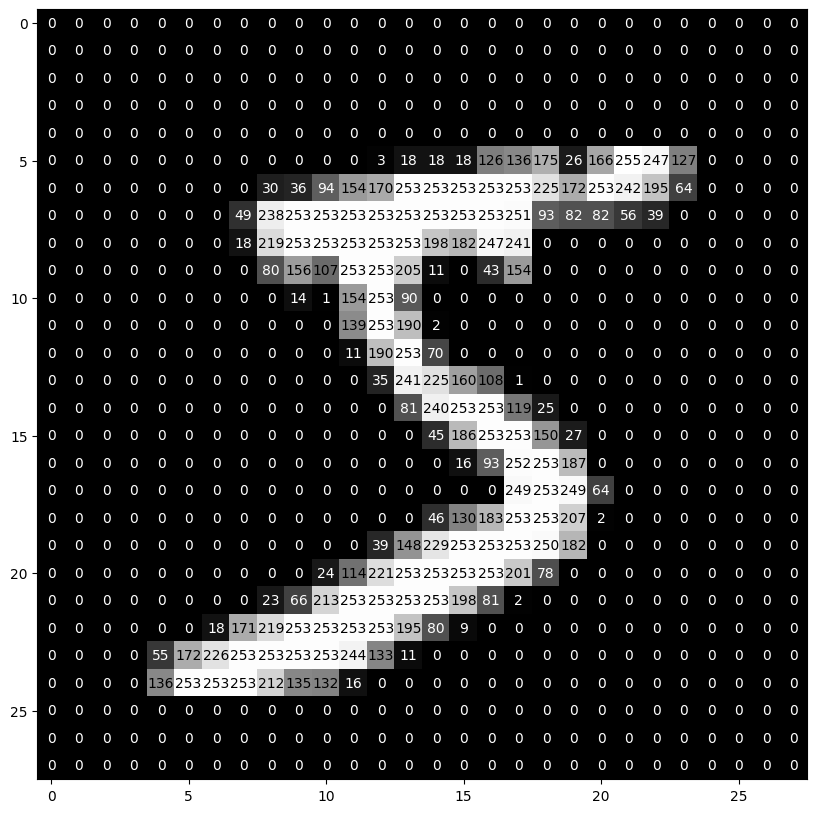

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)

Text(0.5, 1.0, '[2]')

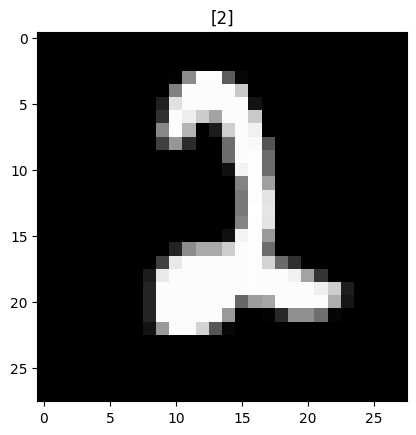

In [4]:
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])

In [5]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [6]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [7]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255

# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [34]:
from keras.layers import Dense
from keras.layers import Flatten

In [35]:
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 3.2063 - accuracy: 0.8986 - val_loss: 0.6879 - val_accuracy: 0.9189
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3889 - accuracy: 0.9335 - val_loss: 0.4031 - val_accuracy: 0.9345
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3103 - accuracy: 0.9388 - val_loss: 0.3946 - val_accuracy: 0.9368
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2950 - accuracy: 0.9385 - val_loss: 0.3703 - val_accuracy: 0.9377
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2744 - accuracy: 0.9439 - val_loss: 0.3204 - val_accuracy: 0.9419
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2417 - accuracy: 0.9481 - val_loss: 0.2982 - val_accuracy: 0.9454
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2174 - accuracy: 0.9538 - val_loss: 0.3228 - val_ac

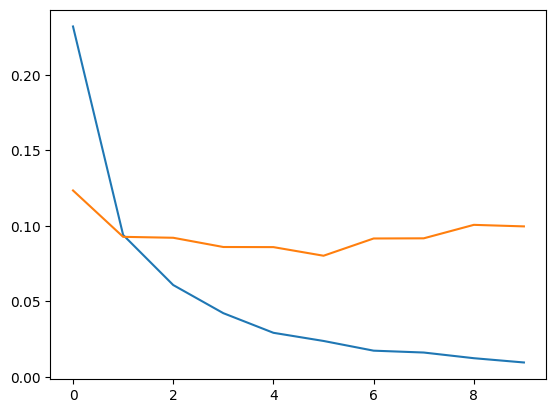

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

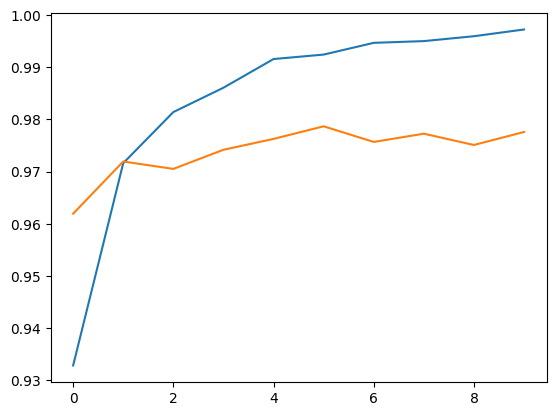

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [38]:
import os
import matplotlib.pyplot as plt

index_of_8 = np.where( y_train == 8)[0][0]
image_of_8 = x_train[index_of_8]

# plt.imshow(image_of_8, cmap='gray')
# plt.show()

if not os.path.exists('./tmp'):
    os.makedirs('./tmp')
plt.imsave('./tmp/8.png', image_of_8, cmap='gray')


1/1 [==============================] - 0s 41ms/step


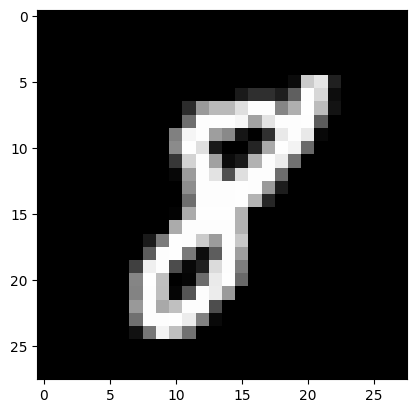

In [39]:
import keras.utils as image

img = image.load_img(path="./tmp/8.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [40]:
prediction

8

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
accuracy_score(y_pred,y_test)

313/313 [==============================] - 2s 6ms/step


0.9807

In [30]:
confusion_matrix(y_pred,y_test)

array([[ 969,    0,    1,    2,    0,    2,    2,    0,    0,    2],
       [   1, 1127,    0,    0,    1,    1,    3,    4,    2,    4],
       [   0,    2, 1007,    2,    2,    0,    0,    6,    3,    0],
       [   0,    0,    1,  991,    0,   11,    1,    1,    2,    3],
       [   1,    0,    4,    0,  970,    1,    1,    0,    4,   15],
       [   2,    0,    0,    3,    0,  868,    2,    1,    4,    5],
       [   2,    2,    2,    0,    3,    3,  949,    0,    1,    1],
       [   1,    1,    7,    5,    2,    0,    0, 1012,    2,   14],
       [   2,    3,    9,    5,    0,    4,    0,    1,  952,    3],
       [   2,    0,    1,    2,    4,    2,    0,    3,    4,  962]],
      dtype=int64)

In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       0.99      0.99      0.99      1143
           2       0.98      0.99      0.98      1022
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       996
           5       0.97      0.98      0.98       885
           6       0.99      0.99      0.99       963
           7       0.98      0.97      0.98      1044
           8       0.98      0.97      0.97       979
           9       0.95      0.98      0.97       980

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
model.save("mnist.hdf5")

## Now it's time to use our hdf5 model file for prediction!

import streamlit as st
from streamlit_drawable_canvas import st_canvas
from tensorflow import keras
import cv2
import numpy as np
model_new = keras.models.load_model('mnist.hdf5')

st.title("MNIST Digit Recognizer")

SIZE = 192

canvas_result = st_canvas(
    fill_color="#ffffff",
    stroke_width=10,
    stroke_color='#ffffff',
    background_color="#000000",
    height=150,
    width=150,
    drawing_mode='freedraw',
    key="canvas",
)

if canvas_result.image_data is not None:
    img_color = cv2.resize(canvas_result.image_data.astype('uint8'), (28, 28))
    img_rescaling = cv2.resize(img_color, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)
    st.write('Input Image')
    st.image(img_rescaling)
    
if st.button('Predict'):
    img_grey = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    pred = model_new.predict(img_grey.reshape(1, 28, 28, 1))
    st.write(f'result: {np.argmax(pred[0])}')
    st.bar_chart(pred[0])

## Seperation of frontend and backend

For this, we should use FastAPI and UviCorn.

## Deployment on streamlit cloud

- https://docs.streamlit.io/streamlit-community-cloud/get-started/deploy-an-app